# Установка и импорт библиотек

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install chromadb
!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB

In [ ]:
!pip freeze #| grep "numpy\|pandas\|lightgbm\|scikit-learn"

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
asgiref==3.7.2
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
backoff==2.2.1
bcrypt==4.1.2
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.23.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.1.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
catboost==1.2.3
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
chroma-hnswlib==0.7.3
chromadb==0.4.24
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.1.0
coloredlogs==15.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confecti

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import chromadb
import catboost
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Работа с данными

In [ ]:
train_df = pd.read_parquet("/content/drive/MyDrive/purple/train_data.pqt")


In [ ]:
train_df.isna().sum()

id                              0
date                            0
balance_amt_avg             65577
balance_amt_max             65577
balance_amt_min             65577
                            ...  
sum_cred_h_oper_3m              0
cnt_cred_h_oper_3m         165252
cnt_days_cred_h_oper_3m    165252
start_cluster                   0
end_cluster                     0
Length: 93, dtype: int64

##Мини анализ данных

кол-во классов

In [ ]:
train_df['start_cluster'].value_counts()

{α}          375947
{}            78803
{α, η}        43824
{α, γ}        32790
{other}       31813
{α, β}         9869
{α, δ}         8537
{α, ε}         5843
{α, θ}         4968
{α, ψ}         3000
{α, μ}         1341
{α, ε, η}      1207
{α, ε, θ}       851
{α, λ}          739
{α, ε, ψ}       374
{λ}              69
{α, π}           25
Name: start_cluster, dtype: int64

<Axes: >

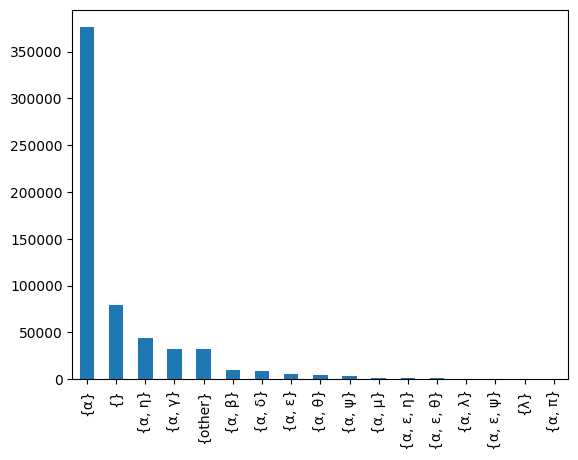

In [ ]:
train_df['start_cluster'].value_counts().plot(kind='bar')

In [ ]:
classes=train_df['end_cluster'].unique()
classes

array(['{other}', '{α}', '{α, γ}', '{}', '{α, ε}', '{α, β}', '{α, η}',
       '{α, μ}', '{α, ψ}', '{α, λ}', '{α, δ}', '{α, θ}', '{α, ε, θ}',
       '{α, ε, ψ}', '{α, ε, η}', '{λ}', '{α, π}'], dtype=object)

##Обработка данных

###Переменные

In [ ]:
#категориальные признаки
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",
]

In [ ]:
#Столбцы для обработки некоторомыми фунциями (названия столбцов вынесены, чтобы пользователь мог регулировать обработку + если вы решите изменить название столбцов нужно будет это отобразить только здесь)
select_dict={
    'list_operations': ['cnt_a_oper_1m', 'cnt_b_oper_1m', 'cnt_c_oper_1m'],
    'list_incoming_operations':['cnt_cred_d_oper_1m', 'cnt_cred_e_oper_1m', 'cnt_cred_f_oper_1m', 'cnt_cred_g_oper_1m', 'cnt_cred_h_oper_1m'],#список входящих операций
    'list_outgoing_operations': ['cnt_deb_d_oper_1m', 'cnt_deb_e_oper_1m', 'cnt_deb_f_oper_1m', 'cnt_deb_g_oper_1m', 'cnt_deb_h_oper_1m'],#список исходящих операций
    'list_operations_summi':['sum_a_oper_1m', 'sum_b_oper_1m', 'sum_c_oper_1m']#список сумм A,B,C операций
}

список признаков для удаления

In [ ]:
drop_list=['cnt_deb_g_oper_3m_3',
 'cnt_cred_g_oper_3m_3',
 'cnt_days_cred_g_oper_3m_3',
 'cnt_cred_h_oper_3m_3',
 'ogrn_days_end_quarter_mean',
 'cnt_b_oper_1m_mean',
 'sum_cred_d_oper_1m_mean',
 'cnt_days_cred_g_oper_1m_mean',
 'cnt_deb_d_oper_3m_mean',
 'cnt_cred_d_oper_3m_mean',
 'sum_cred_f_oper_3m_mean',
 'cnt_days_cred_f_oper_3m_mean',
 'cnt_a_oper_1m_sum',
 'cnt_b_oper_1m_sum',
 'sum_of_paym_2m_hide_1',
 'sum_of_paym_6m_hide_1',
 'sum_of_paym_1y_hide_1',
 'city_1',
 'sum_of_paym_1y_hide_2',
 'city_2',
 'city_type_2',
 'cnt_cred_f_oper_3m_2',
 'sum_of_paym_2m_hide_3',
 'sum_of_paym_6m_hide_3',
 'sum_of_paym_1y_hide_3',
 'city_type_3']

###Фунции для заполнения NaN значений

In [ ]:
#самое простое заполнение NaN (не используется)
def simple_fill(df,cat_cols):
  val_cols = df.select_dtypes(include = ["int64", "float64"])
  #считаем среднее значение по столбцам для каждой группы
  #где не смогли посчитать среднее значение заменяем на 0
  df[val_cols.columns] = df[val_cols.columns].fillna(0)
  df.fillna('', inplace=True)
  #df[cat_cols] = df[cat_cols].astype("category")
  return df

#заменяем все NaN в числовых столбцах на среднее значение по столбцам для каждой группы
def smart_fill_na(full_df, num_month):
  #берем только числовые столбцы
  df = full_df.select_dtypes(include = ["int64", "float64"])
  #считаем среднее значение по столбцам для каждой группы
  mean_df = (df.groupby('id').max() + df.groupby('id').min())/2
  #где не смогли посчитать среднее значение заменяем на 0
  mean_df = mean_df.reset_index().fillna(0)
  #дублируем строки несколько раз
  mean_df = mean_df.loc[mean_df.index.repeat(num_month)].reset_index(drop=True)
  #заменяем все NaN на среднее значение по столбцам для каждой группы
  mask_fill_na = df.isna()*mean_df
  #объединяем с исходной таблицой, так чтобы на месте всех NaN стояли средние значения по маске
  new_val_columns = df.fillna(0)+mask_fill_na

  #full_df.update(new_df)
  return new_val_columns



In [ ]:
#заполнение пропущенных строк в тестовом датасете
def fill_spaces(test_df):
  month_count=len(test_df['date'].unique())
  users_count=len(test_df['id'].unique())

  rows = sorted(np.repeat(test_df['id'].unique(),month_count))
  columns = ['id', 'date']# test_df.columns
  dates=list(test_df['date'].unique())*users_count

  # Создание DataFrame с пустыми строками
  empty_df = pd.DataFrame('', index=range(len(rows)), columns=columns)
  empty_df['id']=rows
  empty_df['date']=dates

  # Заполнение пробелов в test_df
  merged_df = pd.merge(empty_df, test_df, on=['id', 'date'], how='left')
  return merged_df

In [ ]:
#Создание векторной бд для поиска схожих строчек и заполнения пропусков
def create_db(good_df_arr):
  ids=[str(x) for x in range(len(good_df_arr))]
  client = chromadb.Client()
  print('good_df_arr:',good_df_arr.shape)

  try:
    client.delete_collection(name="all-my-documents")
  except:
    pass
  collection = client.create_collection("all-my-documents")

  collection.add(
      embeddings=good_df_arr,
      ids=ids
  )
  return collection

#Ищет похожих пользователей в базе данных (эмбединги пользователей состоят из числовых признаков, и чем они ближе - тем ближе пользователи)
def get_simularity_samples(collection,bad_rows_arr):


  print('bad_rows_arr:',bad_rows_arr.shape)
  results = collection.query(
      query_embeddings=bad_rows_arr,
      n_results=2,

  )
  return results


In [ ]:
#заполняет пустые числовые и категориальные значения
def preprocessing_min(df, cat_cols, num_month):
  #заполнение пустых числовых значений
  new_val_columns=smart_fill_na(df, num_month)
  df.update(new_val_columns)

  df[cat_cols] = df[cat_cols].fillna('')
  #заполнение пустых категориальных значений
  df[cat_cols] = df[cat_cols].astype("category")
  return df

#заполнять нулями значения, которые мы не смогли заполнить на прошлом этапе
def preprocessing_simularity_fill(input_df, df_db):
  df=input_df
  df_for_db=df_db

  df = df.drop('id', axis=1)
  #берем только числовые столбцы
  df = df.select_dtypes(include = ["int64", "float64"])

  df_for_db = df_for_db.drop('id', axis=1)
  #берем только числовые столбцы
  df_for_db = df_for_db.select_dtypes(include = ["int64", "float64"])

  #Находим идеальные строчки (сточки без единого NaN)
  df.replace(0, np.nan, inplace=True)
  df_for_db.replace(0, np.nan, inplace=True)

  df_for_fill=df
  good_df=df_for_db.dropna(axis=0)


  #берем заданное количество идеальных строчек
  good_df=good_df.sample(40000)
  good_df_arr=np.array(good_df.values)


  #берем строки, в которых содержится NaN
  bad_rows=df_for_fill[df_for_fill.isna().any(axis=1)]
  bad_rows_arr=bad_rows.fillna(0)
  index_list = bad_rows_arr.index.tolist()
  bad_rows_arr = np.array(bad_rows_arr.values)

  #для каждой строки с пропущеным значением находим схожую
  collection = create_db(good_df_arr)
  results=get_simularity_samples(collection,bad_rows_arr)
  #жадно берем самую ближайшую строку из идеальных строк для каждой плохой строки
  idx=np.array(results['ids'])[:, 0]
  good_values_df = good_df.iloc[idx]


  #Заменяем все NaN значения из плохих строк на значения (стоящие в том же столбце) из идеальных строк. И так для кажой плохой строки
  bad_rows_idxs=bad_rows.index.tolist()
  good_values_df=good_values_df.set_index(pd.Index(bad_rows_idxs))
  good_values_df.replace(0, np.nan, inplace=True)
  good_values_df=good_values_df.dropna(axis=0)
  bad_rows=bad_rows.fillna(good_values_df)


  #Встраивание обработанных строк в исходную таблицу
  input_df.update(bad_rows)
  return input_df

###Фунции для генерации фичей

In [ ]:
#считает среднее значение по всем числовы характеристикам среди месяцев
def meaning(df):
  new_df = df.select_dtypes(include = ["int64", "float64"])
  new_df['id']=df['id']
  new_df = new_df.groupby("id").mean(numeric_only = True)

  #переименовка признаков
  rename_dict={}
  for name in new_df.columns:
    rename_dict[name]=f'{name}_mean'
  new_df.rename(columns=rename_dict, inplace=True)

  return new_df

#создание подпоследовательностей для каждого пользователя
def do_sublist(df, windows):
  # Получаем подсписки
  sublists = [group.tolist() for group in df['start_cluster'].rolling(window=windows)]

  # Убираем первые windows - 1 элементов, так как они содержат NaN и делаем срез шагом windows
  sublists = sublists[windows-1:]
  sublists = sublists[::windows]
  return sublists

#считает очень быстро, но не точно
def light_check_change_clusters(df):
  unique_counts = df.groupby('id')['start_cluster'].nunique()-1
  unique_counts.name='change_clusters'
  return unique_counts

#подсчет сколько раз пользователь менял свой кластер
def check_change_clusters(df, month_to_predict, light_varsion = True):
  #Избавляемся от месяца для предсказаний и сохраняем в список столбец id
  df = df.drop(df[df['date'] == month_to_predict].index)

  if light_varsion : return light_check_change_clusters(df)

  id_pole = list(df['id'])

  #Вызов функции для разбития start_cluster на подсписки
  sublists = do_sublist(df, 2)

  #формируем словарь из кластеров продуктов и булевых значений чтобы понять менел ли пользователь свой продукт при переходе в новый месяц
  dict_start_cluster = {'cluster':[k for group in sublists for k in group], 'change_clusters':[]}

  #Заполняем словарь булевых значений
  for group in sublists:
    for i in range(0, len(group)-1):
      if group[i] != group[i+1]:
        dict_start_cluster['change_clusters'].append(True)
      else:
        dict_start_cluster['change_clusters'].append(False)
    dict_start_cluster['change_clusters'].append(False)

  #Формируем DataFrame из словаря
  df = pd.DataFrame.from_dict(dict_start_cluster)
  df['id'] = id_pole

  df= df.groupby('id')['change_clusters'].sum()

  #df= df['change_clusters'].apply(str).astype("category")
  return df


def rename_columns(old_names, idx_month):
  new_names={}
  for old_name in old_names:
    new_names[old_name]=old_name+"_"+str(idx_month)
  return new_names

#Объедениение всех месяцев в одну строку
def concat_names(df, test_mode, num_month):

  if test_mode:
    start_month=num_month+1
    drop_arr=['date']
    return pd.concat([df[df['date']==f'month_{x}'].set_index('id').drop(drop_arr, axis=1).rename(rename_columns(df.columns, x-num_month), axis=1) for x in range(start_month, start_month+num_month)], axis=1)
  else:
    drop_arr=['date', 'end_cluster']
    start_month=1
    return pd.concat([df[df['date']==f'month_{x}'].set_index('id').drop(drop_arr, axis=1).rename(rename_columns(df.columns, x), axis=1) for x in range(start_month, start_month+num_month)], axis=1)

  return new_df

def drop_useless_columns(new_df, df, num_month):
  new_df = new_df.drop([f'start_cluster_{num_month}'], axis=1)
  return new_df

#смотрит скрывает ли клиент статистику по определеннвм столбцам
def check_hide_payment(df):
  list_of_payment=['sum_of_paym_2m','sum_of_paym_6m','sum_of_paym_1y']
  rename_dict={}
  for x in list_of_payment:
    rename_dict[x]=f'{x}_hide'
  hide_payment = df[list_of_payment]==0
  hide_payment = hide_payment.rename(rename_dict, axis=1)
  #hide_payment['id']=df['id']
  return hide_payment





In [ ]:
#подсчет кол-ва операций A,B,C за месяца и их общее кол-во
def sum_abc(df, list_operations):
  dict_for_column={old:f'{old}_sum' for old in list_operations}
  list_operations2 = list(dict_for_column.keys())
  list_operations2.append('id')
  df = df[list_operations2]


  #Подсчет суммы количества операций за месяца
  new_dff = df.groupby('id').sum().rename(dict_for_column, axis=1)

  #Сумма abc
  new_dff['sum_operations'] = new_dff[new_dff.columns].sum(axis=1)

  return new_dff

def sum_incoming_operations(df, list_incoming_operations):
  #Создание словаря для смены названия колонок
  dict_for_column={old:f'{old}_sum' for old in list_incoming_operations}
  list_incoming_operations2 = list(dict_for_column.keys())
  list_incoming_operations2.append('id')
  df = df[list_incoming_operations2]

  #Подсчет суммы количества входящих операций за 3 месяца
  df = df.groupby('id').sum().rename(dict_for_column, axis=1)

  #Подсчет суммы количества входящих операций D,E,F,G,H
  df['sum_incoming_operations'] = df[df.columns].sum(axis=1)
  return df

def sum_outgoing_operations(df, list_outgoing_operations):
  #Создание словаря для смены названия колонок
  dict_for_column={old:f'{old}_sum' for old in list_outgoing_operations}
  list_outgoing_operations2 = list(dict_for_column.keys())
  list_outgoing_operations2.append('id')
  df = df[list_outgoing_operations2]

  #Подсчет суммы количества входящих операций за 3 месяца
  df = df.groupby('id').sum().rename(dict_for_column, axis=1)

  #Подсчет суммы количества исходящих операций D,E,F,G,H
  df['sum_outgoing_operations'] = df[df.columns].sum(axis=1)
  return df

#Подсчет суммы сумм операций A,B,C
def sum_operations_summi(df, list_operations_summi):
  #Создание словаря для смены названия колонок
  dict_for_column={old:f'{old}_sum' for old in ['sum_a_oper_1m', 'sum_b_oper_1m', 'sum_c_oper_1m']}
  list_incoming_operations2 = list(dict_for_column.keys())
  list_incoming_operations2.append('id')
  df = df[list_incoming_operations2]

  #Подсчет суммы суммы A,B,C операций за 3 месяца
  dff = df.groupby('id').sum().rename(dict_for_column, axis=1)

  #Подсчет суммы суммы A,B,C операций
  dff['sum_operations_summi'] = dff[dff.columns].sum(axis=1)
  return dff

def ratio_of_summi_to_sum_operations(df):
  sum_operations_summi = df['sum_operations_summi'].values
  sum_operations = df['sum_operations'].values

  ratios = np.where(sum_operations != 0, sum_operations_summi / sum_operations, 0)

  return pd.DataFrame(ratios, columns=['ratio_of_summi_to_sum_operations'])

#Отношение входящих к исходящим операциям
def ratio_of_incoming_to_outgoin_operations(df):
  return pd.DataFrame(df.apply(lambda row: row['sum_incoming_operations'] / row['sum_outgoing_operations'] if row['sum_outgoing_operations'] != 0 else 0, axis=1), columns=['ratio_incoming_to_outgoin_operations'])

#Отношение sum_cred_e_oper_1m к sum_deb_h_oper_1m
def ratio_cred_e_to_deb_h(df):
  return pd.DataFrame(df.apply(lambda row: row['sum_cred_e_oper_1m_mean'] * row['sum_deb_h_oper_1m_1'], axis=1), columns=['sum_cred_e_oper_1m_mean * sum_deb_h_oper_1m_1'])

#Отношение min_founderpres к max_founderpres
def ratio_minfound_to_maxfound(df):
  return pd.DataFrame(df.apply(lambda row: row['min_founderpres_1'] / row['max_founderpres_1'] if row['max_founderpres_1'] != 0 else 0, axis=1), columns=['min_founderpres_1 / max_founderpres_1'])

In [ ]:
#выполнение различных операций над некоторыми столбцами
def analise_operations(df, new_df, select_dict):

  #подсчет кол-ва операций A,B,C за месяца и их общее кол-во
  new_df = pd.concat((new_df, sum_abc(df, select_dict['list_operations'])), axis=1)

  #подсчет исходящих кол-ва операций D,E,F,G,H за месяца и их общее кол-во
  new_df = pd.concat((new_df, sum_incoming_operations(df, select_dict['list_incoming_operations'])), axis=1)

  #подсчет входящих кол-ва операций D,E,F,G,H за месяца и их общее кол-во
  new_df = pd.concat((new_df, sum_outgoing_operations(df, select_dict['list_outgoing_operations'])), axis=1)

  #подсчет суммы сумм операций A,B,C за месяца и их общая сумма
  new_df = pd.concat((new_df,sum_operations_summi(df, select_dict['list_operations_summi'])), axis=1)

  #Подсчет отношения входящих к исходящим операциям
  new_df = pd.concat((new_df, ratio_of_incoming_to_outgoin_operations(new_df)), axis=1)

  #Подсчет отношения суммы A,B,C к кол-ву операции A,B,C
  new_df = pd.concat((new_df, ratio_of_summi_to_sum_operations(new_df)), axis=1)

  new_df = pd.concat((new_df, ratio_cred_e_to_deb_h(new_df)), axis=1)

  new_df = pd.concat((new_df, ratio_minfound_to_maxfound(new_df)), axis=1)
  return new_df

In [ ]:
#Отношение минимального к среднему остатку на счету
def ratio_of_min_to_avg_operations(df):
  return pd.DataFrame(df.apply(lambda row: row['balance_amt_min'] / row['balance_amt_avg'] if row['balance_amt_avg'] != 0 else 0, axis=1), columns=['ratio_of_min_to_avg_operations'])

#Отношение максимального к среднему остатку на счету
def ratio_of_max_to_avg_operations(df):
  return pd.DataFrame(df.apply(lambda row: row['balance_amt_max'] / row['balance_amt_avg'] if row['balance_amt_avg'] != 0 else 0, axis=1), columns=['ratio_of_max_to_avg_operations'])



##pipeline добавления всех фитч

pipeline добавление всех фитч

In [ ]:
#фунция, объеденяющая остальные функции обработки и генерации фич
def make_features(df, df_for_db, month_to_predict, cat_cols, select_dict, test_mode=False):
  """
  df - таблица, для которой хотим сгенерировать фичи
  df_for_db - таблица для создания векторной бд
  month_to_predict - месяц, для которого будем предсказывать end_cluster
  cat_cols - катигориальные столбцы
  select_dict - словарь, содержащий в себе названия столбцов для специальной обработки
  test_mode - если True, то обрабатывается тестовый датасет
  """

  #кол-во месяцев для анализа
  num_month=len(list(df['date'].unique()))

  #заполнение пустых значений среднним значением по пользователю: считаем среднее значение по столбцам для каждой группы, где не смогли посчитать среднее значение заменяем на 0
  df = preprocessing_min(df, cat_cols, num_month)
  #df_for_db = preprocessing_min(df_for_db, cat_cols, num_month) - раскоментируйте, если хотите использовать бд для заполнения значений NaN значениям схожих пользователей (таких 2 строки)

  #смотрит скрывает ли клиент статистику по определеннвм столбцам
  df_1 = check_hide_payment(df)

  #заполнение пустых  значений значениеми со схожих строк
  #df = preprocessing_simularity_fill(df, df_for_db) - раскоментируйте, если хотите использовать бд для заполнения значений NaN значениям схожих пользователей (таких 2 строки)


  df = pd.concat((df_1, df), axis=1)

  #Объедениение всех месяцев в одну строку
  new_df = concat_names(df,test_mode,num_month)

  #считает среднее значение по всем числовы характеристикам среди 3 месяцев
  new_df = pd.concat((new_df,meaning(df)), axis=1)

  #подсчет сколько раз пользователь менял свой кластер
  new_df = pd.concat((new_df,check_change_clusters(df, month_to_predict, light_varsion=True)), axis=1)

  #подсчет кол-ва операций A,B,C за 3 месяца и их общее кол-во
  new_df = pd.concat((new_df, sum_abc(df, select_dict['list_operations'])), axis=1)

  #выбрасывание столбца start_cluster для последнего месеца
  new_df = drop_useless_columns(new_df, df, num_month)



  if not test_mode : new_df['end_cluster']=df[df['date']==month_to_predict][['end_cluster', 'id']].set_index('id')

  #удаление лишних признаков
  try:
    new_df = new_df.drop(drop_list, axis=1)
  except:
    print('Столбцы для удаления не найдены в датафрейме. Обновите список drop_list')

  return new_df

In [ ]:
#выравнивание кол-ва экземпляров класса по определенному числу (дальше это нужно для генерации базы данных)
def equalize_classes(df, classes, cut_value=20000):
  counts_class = df['end_cluster'] .value_counts()

  for class_ in classes:
    if counts_class[class_]>cut_value:
      all_samples_class=df[df['end_cluster']==class_]
      df=df.drop(all_samples_class.index)
      df=df.append(all_samples_class.sample(cut_value,replace=True),ignore_index=True)
    else:
      all_samples_class=df[df['end_cluster']==class_]
      df=df.drop(all_samples_class.index)
      df=df.append(all_samples_class.sample(cut_value,replace=True),ignore_index=True)
  return df



Обработка датасета

In [ ]:
classes=train_df['end_cluster'].unique()
classes

array(['{other}', '{α}', '{α, γ}', '{}', '{α, ε}', '{α, β}', '{α, η}',
       '{α, μ}', '{α, ψ}', '{α, λ}', '{α, δ}', '{α, θ}', '{α, ε, θ}',
       '{α, ε, ψ}', '{α, ε, η}', '{λ}', '{α, π}'], dtype=object)

In [ ]:
#напишите месяц для которого хотите предсказывать end_cluster
month_to_predict='month_3'

In [ ]:
#Наше решение поддерживает неограниченное кол-во месяцев в истории (не только 3), в закоментированном коде вы можите удалить несколько месяцев из датафрейма (с добавление тоже будет работать)
#month_to_drop='month_3'
#train_df=train_df.drop(train_df[train_df['date']==month_to_drop].index)
#month_to_predict='month_2'

In [ ]:
#Создает балансированную выборку из классов (служит для заполнения бд)
df_db= equalize_classes(train_df,classes)

<ipython-input-23-fddc977834d5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(all_samples_class.sample(cut_value,replace=True),ignore_index=True)
<ipython-input-23-fddc977834d5>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(all_samples_class.sample(cut_value,replace=True),ignore_index=True)


In [ ]:

#заполнение фичами
train_df = make_features(train_df.copy(),df_db.copy(), month_to_predict, cat_cols, select_dict)

##Подготовка данных для обучения

Разделение датасета

In [ ]:
df_train, df_val = train_test_split(train_df,test_size=0.2,random_state=42)
#del train_df

In [ ]:
plt.subplot(1, 2, 1)
df_val['end_cluster'].value_counts().plot(kind='bar')
plt.title("df_val histogramm")
plt.subplot(1, 2, 2)
df_train['end_cluster'].value_counts().plot(kind='bar')
plt.title("df_train histogramm")
plt.tight_layout()  # Этот метод позволяет избежать наложения элементов графиков
plt.show()

Веса классов

In [ ]:
cluster_weights = pd.read_excel("/content/drive/MyDrive/purple/cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()

In [ ]:
#функция для изменения весов классам
def transform_weight(weights_dict, koef):
  new_weights_dict={}
  for key, val in weights_dict.items():
    new_weights_dict[key]=val*koef
  return new_weights_dict

In [ ]:
weights_dict = transform_weight(weights_dict, 1)
weights_dict





# Работа с моделью

In [ ]:
df_train.info()

Подготовка данных

In [ ]:
auxiliary_columns = ["date"]
cat_features = list(df_train.select_dtypes(include=['category']).columns)

In [ ]:
#словари для перевод класса в число и наоборот
n2c={}
c2n={}
for i, class_ in enumerate(classes):
  n2c[i]=class_
  c2n[class_]=i

In [ ]:
def class_to_num(s):
  s=[c2n[x] for x in s]
  return s

def preprocess_data_part(data_part, c2n_bool = False):
    #data_part = data_part.drop(auxiliary_columns, axis=1)

    X = data_part.drop(['end_cluster'], axis=1)
    y = data_part['end_cluster']
    if c2n_bool : y = class_to_num(y)
    return X, y

X_train, y_train = preprocess_data_part(df_train)
X_val, y_val = preprocess_data_part(df_val)



In [ ]:
X_train.sample(3)

Преобразование датасетов к catboost формату

In [ ]:
from catboost import Pool

train_pool = Pool(
    X_train, y_train,
    cat_features=cat_features,
)

validation_pool = Pool(
    X_val, y_val,
    cat_features=cat_features,
)


##Обучение

In [ ]:
from catboost import CatBoostClassifier

def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        class_weights=weights_dict,#list_of_weights,
        iterations=10000,
        learning_rate=0.05,
        loss_function="MultiClass",
        eval_metric='AUC',
        task_type='GPU',
        train_dir='train',
        early_stopping_rounds=1000,
        grow_policy = "SymmetricTree",#"SymmetricTree" #Depthwise #Lossguide
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=500,
    )

model = fit_model(train_pool, validation_pool)

In [ ]:
model.save_model('catboost_model.bin')

In [ ]:
model.predict(validation_pool, prediction_type="Probability")

##Обработка ответа

In [ ]:
y_pred = model.predict(validation_pool)

In [ ]:
del train_df
del y_train, train_pool, validation_pool, X_train
del df_train, df_val

###Confusion matrix

In [ ]:
y_val

In [ ]:
#подсчет количества различных классов, находящихся в y_val
gg=pd.DataFrame(y_val).value_counts()
gg=pd.DataFrame(gg).transpose().to_dict()
count_dict={}
for c in classes:
  count_dict[c]=gg[(c,)][0]

counts = np.array(list(count_dict.values()))

In [ ]:
counts

In [ ]:
#вычисление матрицы путанницы
cm = confusion_matrix(y_val, y_pred, labels=classes)


In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#отобразим матрицу путанницы в процентах (100% распыляются по строкам)
procent_cm = cm / counts[:, np.newaxis]
plt.figure(figsize=(12, 10))
sns.heatmap(np.round(procent_cm, decimals=2), annot=True, cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Procented Confusion Matrix")
plt.show()

###Подсчет важности фичей

In [ ]:
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

In [ ]:
len(feature_importances)

In [ ]:
list(feature_importances['Importances'][320:])

In [ ]:
list(feature_importances['Feature Id'][320:])

In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')#[:20]
feature_importances = pd.Series(importances, index=X_val.columns).sort_values().iloc[len(X_val.columns)-20:]

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

#Анализ важности фичей

Для улучшения работы модели и более глубокого понимания исходных данных мы анализируем важность наших фичей, используя библиотеку shap, то есть расчитываем вклад каждой функции в итоговое предсказание модели. Для анализа используются графики force plot (график силы) и summary plot(итоговый график).

На графике силы красные полосы показывают, что их функции увеличивают значение до более высоких значений. Синие полосы показывают, что их особенности приводят к снижению ценности. Чем шире полоса, тем выше (по абсолютному значению) вклад. Сумма этих вкладов увеличивает значение целевой переменной до конечного, прогнозируемого значения.

На итоговом графике каждая точка каждой строки является записью тестового набора данных. Функции отсортированы от наиболее важных к менее важным. Цветом обозначены значения соответствующего признака: высокие – красным , низкие – синим.

In [ ]:
classes

**Выбор класса для анализа**

In [ ]:
mini_coef=10

In [ ]:
X_val=X_val[:len(X_val)//mini_coef]
y_val=y_val[:len(y_val)//mini_coef]

In [ ]:
name_of_class = '{α, ε, θ}' #@param ['{α}', '{}', '{α, η}', '{α, β}', '{other}', '{α, γ}', '{α, θ}','{α, δ}', '{α, μ}', '{α, ε}', '{α, ε, θ}', '{α, ε, η}', '{α, ψ}','{α, ε, ψ}', '{λ}', '{α, λ}', '{α, π}']

#выборк на которой будем смотреть важность
pool = Pool(
    X_val, y_val, cat_features=cat_features
)

#расчет важности фичей
num_class=c2n[name_of_class]
explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(pool)[:, :, num_class]
print(shap_values.shape)

##force plot

Визуализация, называемая силовой график (force plot), которая помогает понять, как входные признаки влияют на предсказания модели.

Силовой график SHAP состоит из графика, в котором каждая стрелка представляет влияние одного конкретного признака на предсказание модели. В каждой стрелке отображается величина вклада этого признака в изменение предсказания от базового уровня (чаще всего среднего значения предсказания). Таким образом, силовой график помогает визуализировать влияние каждого признака на изменение предсказаний модели относительно базового уров

In [ ]:
#пользователь для проверки
user=3

shap.initjs()
shap.force_plot(explainer.expected_value[num_class], shap_values[user,:], X_val.iloc[user,:])

##force_plot для среза людей

По оси X у нас расположена шкала вклада значения фичи, по оси Y — количество объектов.

**Количество пользователей для проверки**

In [ ]:
count_users = 253 #@param {type:"slider", min:0, max:40000, step:1}

#срез пользователей для проверки
shap.initjs()
X_small = X_val.iloc[:count_users]
shap_small = shap_values[:count_users]
shap.force_plot(explainer.expected_value[num_class], shap_small, X_small)

##summary_plot


shap.summary_plot в библиотеке SHAP предназначен для визуализации обобщенного вклада признаков в модель машинного обучения. Этот график предоставляет общий обзор важности каждого признака в датасете.

Визуализация включает в себя вертикальные полосы, представляющие различные признаки, а горизонтальные полосы представляют вклад каждого признака для каждого наблюдения. Цвет каждой полосы указывает на значение признака (например, красный для более высоких значений, синий для более низких).

В shap.summary_plot, серые полосы представляют базовое значение (expected value) модели. Базовое значение представляет собой среднюю ожидаемую предсказанную целевую переменную на всем наборе данных. Такие полосы влияния (SHAP values) отображают вклад каждого признака в отклонение предсказания от базового уровня.

-------------------------

В случае классификации, каждая серая полоса представляет собой базовое значение для каждого класса. Таким образом, они отображают средние предсказания для каждого класса на всем наборе данных.

Если полоса признака пересекает серую полосу, это указывает на отклонение от базового значения для данного признака. Если полоса идет вправо от серой полосы, это значит, что значение признака положительно влияет на предсказание, а если влево — отрицательно.

Важно отметить, что ширина полосы также важна. Чем шире полоса, тем больше разброс значений признака в данных. Таким образом, ширина полосы также предоставляет информацию о дисперсии значений признака в выборке.

In [ ]:
X_val

In [ ]:
shap.summary_plot(shap_values, X_val)

# Прогноз на тестовой выборке

In [ ]:
test_df = pd.read_parquet("/content/drive/MyDrive/purple/test_data.pqt")
#train_df = pd.read_parquet("/content/drive/MyDrive/purple/train_data.pqt")


test_df = fill_spaces(test_df)

In [ ]:
month_to_predict_test='month_6'
test_df = make_features(test_df.copy(),df_db.copy(), month_to_predict_test, cat_cols,select_dict, test_mode=True)

In [ ]:
test_df.sample(3)

Делаем прогноз

In [ ]:
test_pred = model.predict(test_df, prediction_type="Probability")
test_pred = pd.DataFrame(test_pred, columns=model.classes_)
sorted_classes = sorted(test_pred.columns.to_list())
test_pred_proba_df = test_pred[sorted_classes]

In [ ]:
test_pred_proba_df.shape

In [ ]:
test_pred_proba_df.head(2)

In [ ]:
sample_submission_df = pd.read_csv("/content/drive/MyDrive/purple/sample_submission.csv")

In [ ]:
sample_submission_df[sorted_classes] = test_pred_proba_df
sample_submission_df.to_csv("baseline_submission.csv", index=False)